## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [48]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [2]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [3]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [4]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().mean()

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [8]:
#5 Prepare  X (independent variables) and y (dependent variable)

x=df.drop(columns='price')
y=df['price']

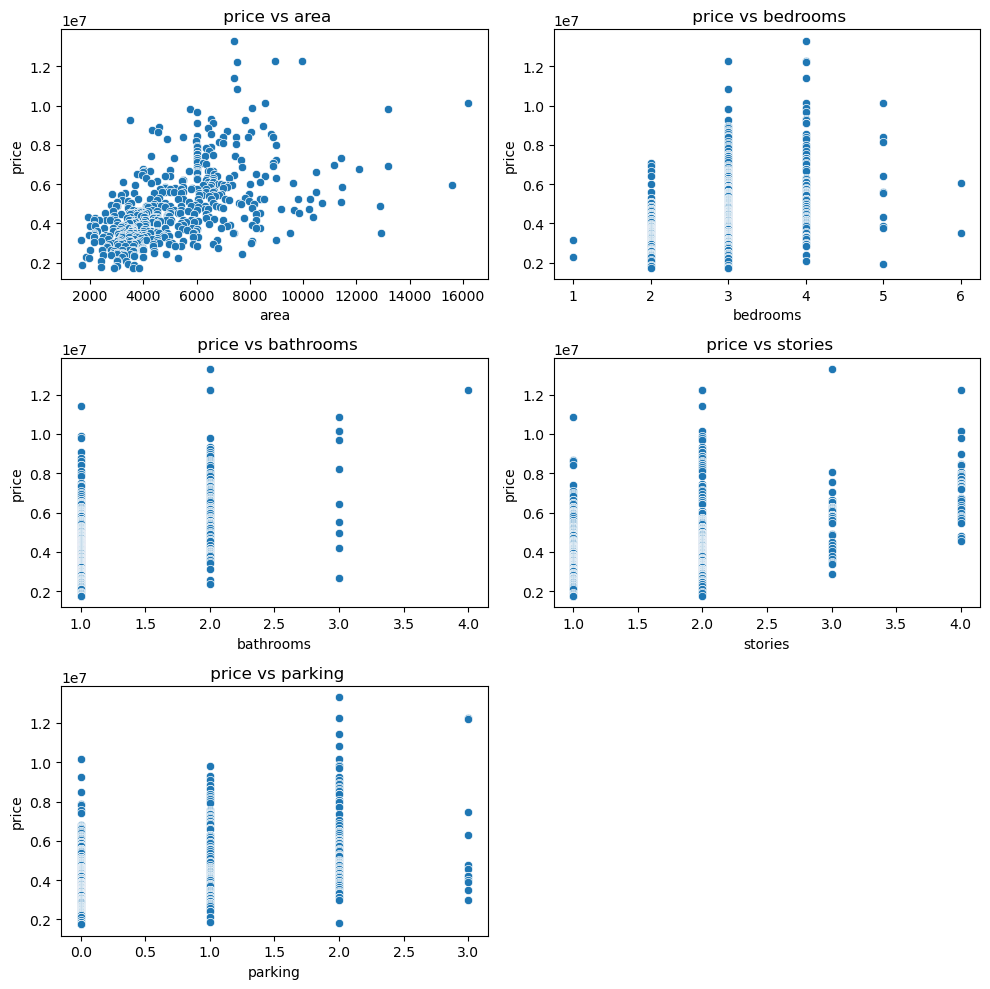

In [45]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots

cols=df.select_dtypes(include='number').columns
colss=df[[i for i in cols if i !='price']]

fig,axes=plt.subplots(3,2,figsize=(10,10))
axes=axes.flatten()
for i,col in enumerate(colss):
    cu_ax=axes[i]
    sns.scatterplot(x=df[col],y=y,ax=cu_ax)
    cu_ax.set_xlabel(col)
    cu_ax.set_title(f" price vs {col}")

plt.delaxes(axes[-1])
plt.tight_layout()
plt.show()   


In [53]:
#7 Encoding categorical data in X
le=LabelEncoder()

col=x.select_dtypes(include='object').columns
for i in col:
  x[i]=le.fit_transform(x[i])

x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
#8  Avoiding the Dummy Variable Trap

In [63]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler
col=df.select_dtypes(include='number').columns.tolist()
col.remove('price')
sd=StandardScaler()
x[col]=sd.fit_transform(x[col])
x.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,0
1,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,0
2,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1
3,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,0
4,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,0


In [67]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

print(x_train)

         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
126  0.926808  0.047278  -0.570187 -0.929397         1          0         1   
363 -0.722525 -1.308863  -0.570187 -0.929397         1          0         0   
370 -0.401514 -1.308863  -0.570187 -0.929397         1          0         0   
31   0.853013  0.047278  -0.570187  2.532024         1          0         0   
113  2.061417  0.047278  -0.570187 -0.929397         1          0         1   
..        ...       ...        ...       ...       ...        ...       ...   
71   0.391790  1.403419   1.421812  2.532024         1          0         0   
106  0.138117  1.403419   1.421812 -0.929397         1          0         1   
270 -0.300045  0.047278   1.421812  1.378217         1          0         0   
435 -0.512207 -1.308863  -0.570187 -0.929397         1          0         0   
102  0.161178  0.047278   1.421812  2.532024         1          1         0   

     hotwaterheating  airconditioning   parking  pr

In [74]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn. linear_model import LinearRegression

model=LinearRegression()

model.fit(x_train,y_train)
print(model.intercept_)
print(model.coef_)



4071726.923233442
[ 548676.87299684   61007.57353683  560930.5907925   360373.26651063
  408320.46478164  279534.04145787  484980.21525134  619934.34714776
  680006.92089594  261749.09078536  509441.46380309 -198031.32519469]


In [78]:
#12 Predict on the train set and calculate the error = y_pred - y_train

y_pred=model.predict(x_train)
error=y_pred- y_train
error

126   -5.477012e+05
363   -1.499996e+05
370    7.643610e+05
31    -1.977171e+06
113    2.678948e+05
           ...     
71    -1.913138e+05
106    2.095515e+05
270    1.985625e+06
435   -4.325689e+05
102    9.410638e+05
Name: price, Length: 381, dtype: float64

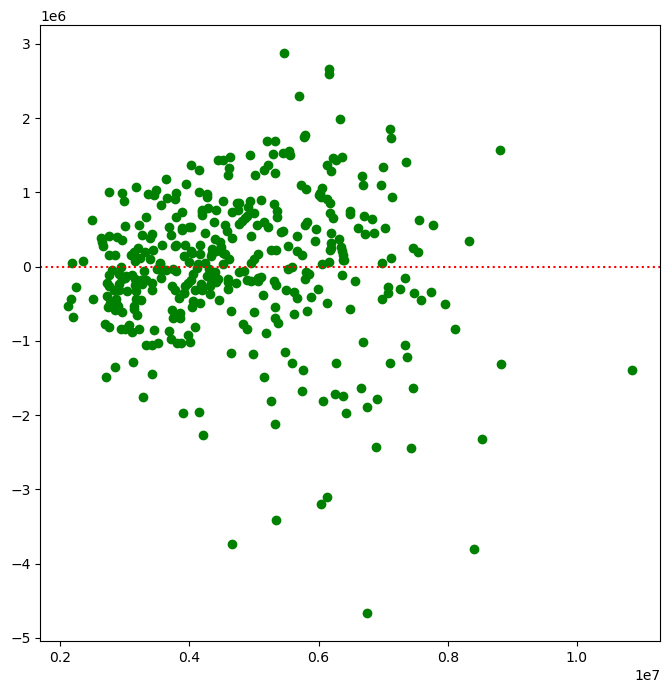

In [83]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

plt.figure(figsize=(8,8))
plt.scatter(x=y_pred,y=error, color='green')
plt.axhline(y=0,color='red',linestyle='dotted')

In [ ]:
#14  Predic on the test set

In [ ]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

In [ ]:
#16 Print Mean Squared Error and R Squared Value

In [33]:
cols = df.select_dtypes(include='number').columns  # all numeric column names
colss = df[[col for col in cols if col != 'price']]  # exclude 'price'


In [35]:
cols=df.select_dtypes(include='number').columns
colss=df[[col for col in cols if col !='price']]

In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)